In [1]:
# ===================================
# Cell 1: Imports
# ===================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.multivariate.manova import MANOVA
from sklearn.cross_decomposition import CCA

print("All libraries imported successfully")


All libraries imported successfully


In [2]:
# ===================================
# Cell 2: Load Fusion Features
# ===================================
DATA_PATH = "../Data/processed/fused_ppg_acc_features.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1158, 29)


,subject_id,activity,hr_bpm,hrv,peak_count,R_ratio,red_ac,ir_ac,ppg_mean,ppg_std,...,ax_rms,ay_rms,az_rms,sma,ax_energy,ay_energy,az_energy,ax_entropy,ay_entropy,az_entropy
0,s12,run,99.709182,0.007644,9,1.580212,98.586438,256.296416,-1.116858,68.371286,...,0.885659,0.973383,1.063934,2.341158,1959.412897,2366.793253,2827.628172,2.212839,3.306854,2.456894
1,s12,run,100.190840,0.011256,8,1.036670,91.672293,219.962447,2.855715,59.774673,...,0.964208,1.238615,1.235612,2.775671,2322.382918,3832.352997,3813.791349,2.711380,3.213158,2.860193
2,s12,run,93.541203,0.036374,8,1.550534,93.461807,202.217577,2.343746,59.500541,...,0.961333,1.306386,1.200691,2.766003,2308.557564,4263.198379,3601.265495,2.204404,2.552857,2.353520
3,s12,run,86.248203,0.019813,7,1.098686,85.358685,185.129674,-2.086325,58.417425,...,0.965035,1.500704,1.392992,3.060616,2326.371625,5625.781375,4847.190902,2.584731,2.832697,2.625304
4,s12,run,85.836910,0.017000,7,-0.962195,73.637724,182.366085,-0.376455,58.327658,...,0.865292,1.424049,1.335625,2.864869,1870.330840,5065.739702,4456.168899,2.685710,3.077220,2.545995


In [3]:
# ===================================
# Cell 3: Separate features and labels
# ===================================
# Exclude subject_id, activity, hr_bpm, R_ratio from features
X = df.drop(columns=["subject_id", "activity", "hr_bpm", "R_ratio"])
y_activity = df["activity"]
y_physio = df[["hr_bpm", "R_ratio"]]

print("Feature matrix shape:", X.shape)
print("Unique activity labels:", y_activity.unique())
print("Physio targets shape:", y_physio.shape)


Feature matrix shape: (1158, 25)
Unique activity labels: ['run' 'sit' 'walk']
Physio targets shape: (1158, 2)


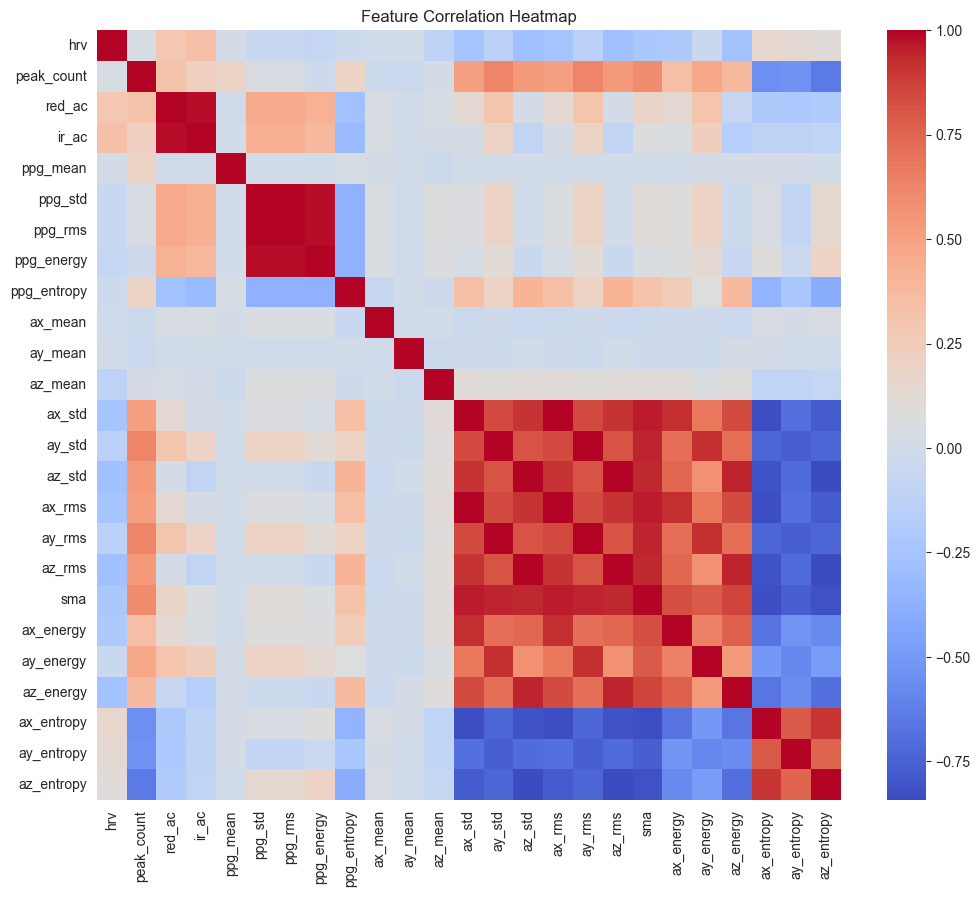

In [4]:
# ===================================
# Cell 4: Correlation Heatmap
# ===================================
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
# ===================================
# Cell 5: MANOVA - Features vs Activity
# ===================================
X_activity_df = X.copy()
X_activity_df["activity"] = y_activity

# MANOVA test
manova = MANOVA.from_formula(
    'ppg_mean + ppg_std + ppg_rms + ppg_energy + ppg_entropy + '
    'ax_mean + ay_mean + az_mean + ax_std + ay_std + az_std + '
    'ax_rms + ay_rms + az_rms + sma + ax_energy + ay_energy + az_energy + '
    'ax_entropy + ay_entropy + az_entropy ~ activity',
    data=X_activity_df
)

manova_results = manova.mv_test()
print("MANOVA results:")
print(manova_results)


MANOVA results:
                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda   0.0052 7.0000 1149.0000 31448.3390 0.0000
         Pillai's trace   0.9948 7.0000 1149.0000 31448.3390 0.0000
 Hotelling-Lawley trace 191.5913 7.0000 1149.0000 31448.3390 0.0000
    Roy's greatest root 191.5913 7.0000 1149.0000 31448.3390 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
        activity         Value   Num DF   Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda  0.0066 14.0000 2298.0000  18

C:\Users\n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


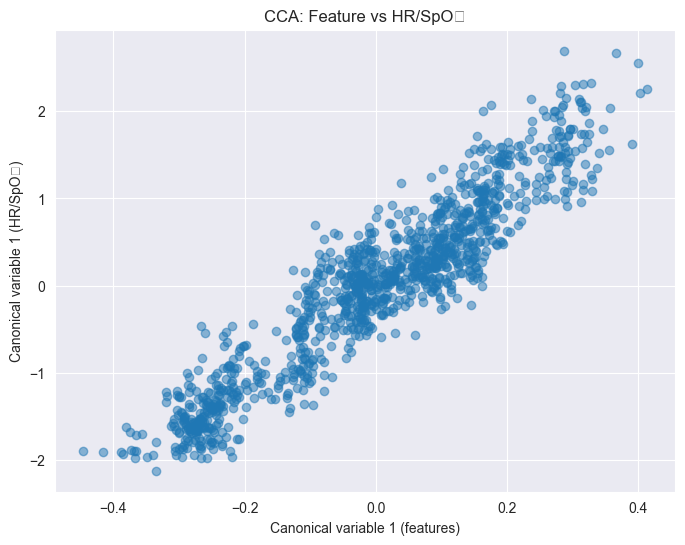

In [6]:
# ===================================
# Cell 6: CCA - Features vs Physiological Targets
# ===================================
cca = CCA(n_components=2)
cca.fit(X, y_physio)
X_c, Y_c = cca.transform(X, y_physio)

# Scatter plot of canonical variables
plt.figure(figsize=(8,6))
plt.scatter(X_c[:,0], Y_c[:,0], alpha=0.5)
plt.xlabel("Canonical variable 1 (features)")
plt.ylabel("Canonical variable 1 (HR/SpO₂)")
plt.title("CCA: Feature vs HR/SpO₂")
plt.show()


In [ ]:
# UNIVARIATE ANOVA FOR FINAL FEATURE SELECTION

In [7]:
# Data handling
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import f_oneway
from sklearn.cross_decomposition import CCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully")


Libraries imported successfully


In [8]:
# Features (exclude subject_id, activity, HR, R_ratio)
X = df.drop(columns=['subject_id','activity','hr_bpm','R_ratio'])

# Targets for CCA
Y = df[['hr_bpm','R_ratio']]

print("Features shape:", X.shape)
print("Targets shape:", Y.shape)
X.head()


Features shape: (1158, 25)
Targets shape: (1158, 2)


,hrv,peak_count,red_ac,ir_ac,ppg_mean,ppg_std,ppg_rms,ppg_energy,ppg_entropy,ax_mean,...,ax_rms,ay_rms,az_rms,sma,ax_energy,ay_energy,az_energy,ax_entropy,ay_entropy,az_entropy
0,0.007644,9,98.586438,256.296416,-1.116858,68.371286,68.380407,1.168347e+07,1.845303,-3.524292e-16,...,0.885659,0.973383,1.063934,2.341158,1959.412897,2366.793253,2827.628172,2.212839,3.306854,2.456894
1,0.011256,8,91.672293,219.962447,2.855715,59.774673,59.842850,8.966132e+06,2.225075,-1.364242e-16,...,0.964208,1.238615,1.235612,2.775671,2322.382918,3832.352997,3813.791349,2.711380,3.213158,2.860193
2,0.036374,8,93.461807,202.217577,2.343746,59.500541,59.546683,8.871155e+06,1.778282,-3.410605e-17,...,0.961333,1.306386,1.200691,2.766003,2308.557564,4263.198379,3601.265495,2.204404,2.552857,2.353520
3,0.019813,7,85.358685,185.129674,-2.086325,58.417425,58.454669,8.546416e+06,1.426971,-1.705303e-17,...,0.965035,1.500704,1.392992,3.060616,2326.371625,5625.781375,4847.190902,2.584731,2.832697,2.625304
4,0.017000,7,73.637724,182.366085,-0.376455,58.327658,58.328873,8.499200e+06,1.274032,-1.818989e-16,...,0.865292,1.424049,1.335625,2.864869,1870.330840,5065.739702,4456.168899,2.685710,3.077220,2.545995


In [10]:
# Features (exclude subject_id, activity, HR, R_ratio)
X = df.drop(columns=['subject_id','activity','hr_bpm','R_ratio'])

# Targets for CCA
Y = df[['hr_bpm','R_ratio']]

print("Features shape:", X.shape)
print("Targets shape:", Y.shape)
X.head()



Features shape: (1158, 25)
Targets shape: (1158, 2)


,hrv,peak_count,red_ac,ir_ac,ppg_mean,ppg_std,ppg_rms,ppg_energy,ppg_entropy,ax_mean,...,ax_rms,ay_rms,az_rms,sma,ax_energy,ay_energy,az_energy,ax_entropy,ay_entropy,az_entropy
0,0.007644,9,98.586438,256.296416,-1.116858,68.371286,68.380407,1.168347e+07,1.845303,-3.524292e-16,...,0.885659,0.973383,1.063934,2.341158,1959.412897,2366.793253,2827.628172,2.212839,3.306854,2.456894
1,0.011256,8,91.672293,219.962447,2.855715,59.774673,59.842850,8.966132e+06,2.225075,-1.364242e-16,...,0.964208,1.238615,1.235612,2.775671,2322.382918,3832.352997,3813.791349,2.711380,3.213158,2.860193
2,0.036374,8,93.461807,202.217577,2.343746,59.500541,59.546683,8.871155e+06,1.778282,-3.410605e-17,...,0.961333,1.306386,1.200691,2.766003,2308.557564,4263.198379,3601.265495,2.204404,2.552857,2.353520
3,0.019813,7,85.358685,185.129674,-2.086325,58.417425,58.454669,8.546416e+06,1.426971,-1.705303e-17,...,0.965035,1.500704,1.392992,3.060616,2326.371625,5625.781375,4847.190902,2.584731,2.832697,2.625304
4,0.017000,7,73.637724,182.366085,-0.376455,58.327658,58.328873,8.499200e+06,1.274032,-1.818989e-16,...,0.865292,1.424049,1.335625,2.864869,1870.330840,5065.739702,4456.168899,2.685710,3.077220,2.545995


In [11]:
feature_pvals = {}

for col in X.columns:
    # group values by activity
    groups = [X[col][df['activity'] == act].values for act in df['activity'].unique()]
    f_stat, p_val = f_oneway(*groups)
    feature_pvals[col] = p_val

# Convert to DataFrame and sort
anova_results = pd.DataFrame.from_dict(feature_pvals, orient='index', columns=['p_value'])
anova_results = anova_results.sort_values('p_value')
anova_results


,p_value
ax_std,0.000000e+00
ay_std,0.000000e+00
az_std,0.000000e+00
ax_rms,0.000000e+00
ax_entropy,0.000000e+00
sma,0.000000e+00
az_rms,0.000000e+00
ay_rms,0.000000e+00
az_entropy,0.000000e+00
ay_entropy,5.832915e-236


In [12]:
# Select top 15 features based on lowest p-value
top_features_anova = anova_results.index[:15].tolist()
print("Top features by ANOVA:", top_features_anova)

X_top_anova = X[top_features_anova]


Top features by ANOVA: ['ax_std', 'ay_std', 'az_std', 'ax_rms', 'ax_entropy', 'sma', 'az_rms', 'ay_rms', 'az_entropy', 'ay_entropy', 'az_energy', 'ax_energy', 'ay_energy', 'peak_count', 'ppg_rms']


In [13]:
cca = CCA(n_components=2)
cca.fit(X, Y)

X_c, Y_c = cca.transform(X, Y)

print("CCA components shapes:", X_c.shape, Y_c.shape)


CCA components shapes: (1158, 2) (1158, 2)


In [14]:
# Correlation of each feature with first CCA component
cca_corr = pd.Series(np.abs(np.corrcoef(X.T, X_c[:,0])[0:X.shape[1], -1]), index=X.columns)
cca_corr = cca_corr.sort_values(ascending=False)
print("Top features by CCA correlation:\n", cca_corr.head(15))


Top features by CCA correlation:
 peak_count    0.954313
az_entropy    0.771247
ay_rms        0.749968
ay_std        0.749968
sma           0.706429
ax_entropy    0.668803
ay_entropy    0.640348
az_rms        0.636805
az_std        0.636805
ax_std        0.610258
ax_rms        0.610258
ay_energy     0.568105
az_energy     0.448247
ax_energy     0.408165
red_ac        0.376251
dtype: float64


In [16]:
# Take intersection of top 15 ANOVA + top 15 CCA
top_cca_features = cca_corr.index[:15].tolist()
final_features = list(set(top_features_anova) | set(top_cca_features))

print("Final selected features for MLP:", final_features)
X_final = X[final_features]
X_final.shape


Final selected features for MLP: ['ax_rms', 'ax_std', 'ay_energy', 'peak_count', 'az_entropy', 'ax_energy', 'az_rms', 'ppg_rms', 'az_std', 'sma', 'ax_entropy', 'ay_entropy', 'az_energy', 'ay_rms', 'red_ac', 'ay_std']


(1158, 16)